# Разработка стратегии взаимодействия с клиентами на основе аналитических данных для фитнес центра

Цели: прогноз вероятности оттока клиента, выявление типичного портрета клиентов, анализ основных признаков, наиболее сильно влияющих на отток.

 Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:
- 'Churn' — факт оттока в текущем месяце;

Текущие поля в датасете:

Данные клиента за предыдущий до проверки факта оттока месяц:
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

# Загрузка библиотек и данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = pd.read_csv('/datasets/gym_churn.csv')
data

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [3]:
data.duplicated().sum()

0

# Вывод

Данные загружены, пропусков и дубликатов в них нет, все типы данных соответствуют, предобработка не требуется.

# Исследовательский анализ данных

In [4]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [5]:
datagrouped = data.groupby('Churn')[('gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month')].mean()
datagrouped

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [6]:
# выделим данные тех, кто ушел
outflow = data.query('Churn == 1')

In [7]:
outflow

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
11,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316,1
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.000000,1
21,0,0,0,0,1,1,0,30,153.198594,1.0,3,0.636382,0.000000,1
23,1,1,0,0,1,1,1,32,276.079882,1.0,1,1.420637,1.043101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,1,1,0,0,1,1,0,24,135.395712,1.0,0,1.390251,0.789321,1
3984,1,1,0,0,1,6,1,22,101.107544,6.0,2,1.377860,0.343915,1
3986,0,1,1,1,1,1,1,34,226.804845,1.0,0,1.399529,0.304130,1
3994,1,1,0,0,1,1,0,26,31.066721,1.0,1,1.157451,0.269597,1


In [8]:
# выделим данные тех, кто остался
stayed = data.query('Churn == 0')
stayed

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,0,1,1,0,1,1,0,33,231.778628,1.0,3,1.418791,1.450442,0
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2183dbeed0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2181cf4350>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2181cc7510>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2181ca09d0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2181c54310>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2181bb8410>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2181bdd310>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2181b33710>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2181bf7e90>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2181a47590>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2181a20810>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2181979c50>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21888fb290>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21818b4490>]]


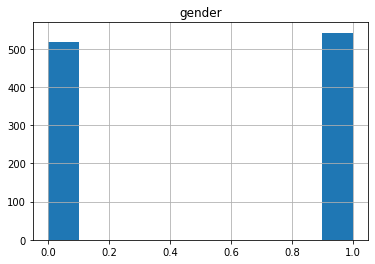

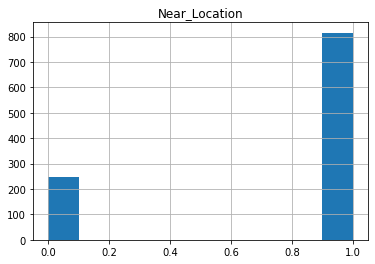

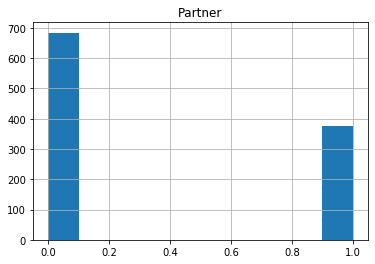

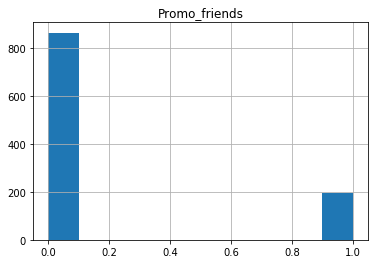

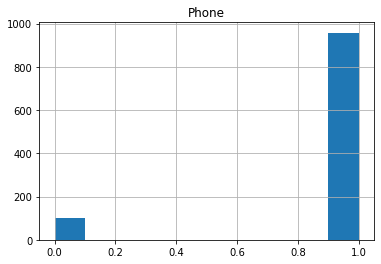

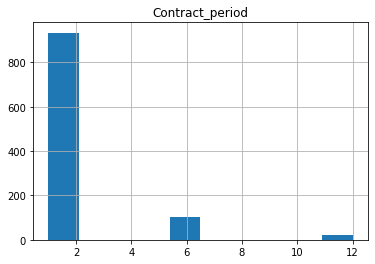

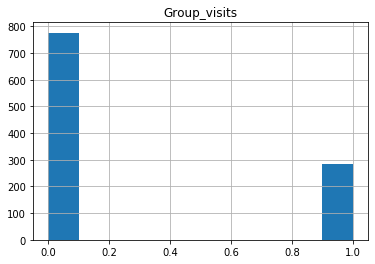

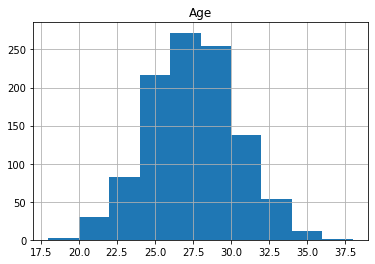

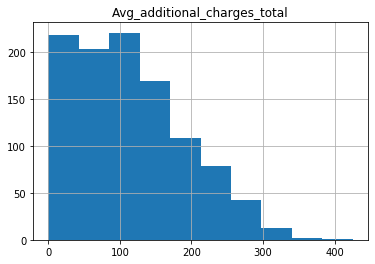

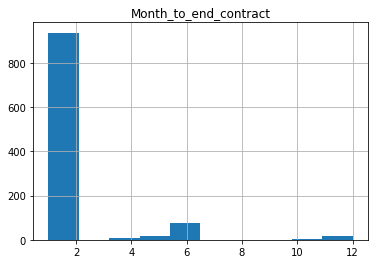

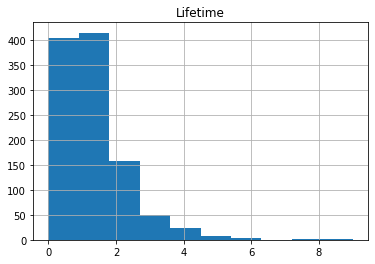

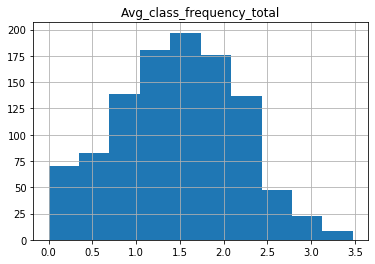

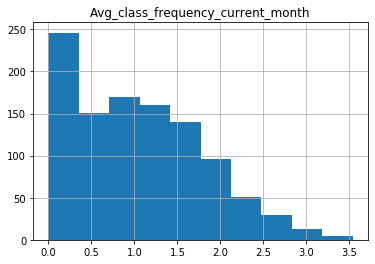

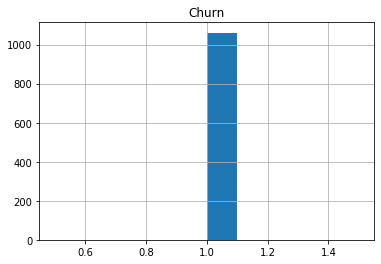

In [9]:
# построим гистограммы метрик тех, кто ушел
for i in outflow.columns:
    print(outflow.hist(i));

По графикам видно, что в данных для тех, кто ушёл (отток): 
- распределяние по полу (мужской/женский) практически одинаково; 
- тех, кто живет поблизости почти в 3 раза больше, чем тех кто живет далеко; 
- партнеров клуба почти в 2 раза больше, чем не партнеров; 
- тех, кто использовал промо-код от знакомого при оплате первого абонемента в 4 раза меньше, чеи без него;
- большая часть клиентов с длительностью текущего действующего абонемента 1 месяц;
- групповых занятия посещают почти в 2,5 раза меньше;
- средний возраст посетителей 27 лет;
- суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон в среднем до 300 у.е.
- у большинства срок до окончания текущего действующего абонемента 1 месяц;
- у большинства прошло до 4 месяцев с момента первого обращения в фитнес-центр;
- 1 -2 раза средняя частота посещений в неделю за все время с начала действия абонемента
- большинство посещает спортзал от 0 до 2 раз в неделю за предыдущий месяц;

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2181b336d0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2180f32910>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2180e8cbd0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2180e73110>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2180e24a50>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2180df2ed0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2180da2a50>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2180d7ae10>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2180ce1290>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2180c10a50>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2180be8ed0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2180b50350>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2180b26750>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2180affb90>]]


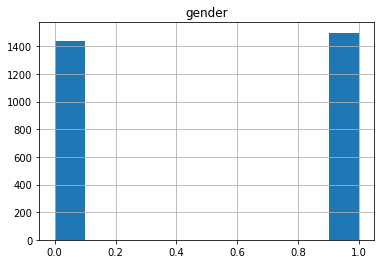

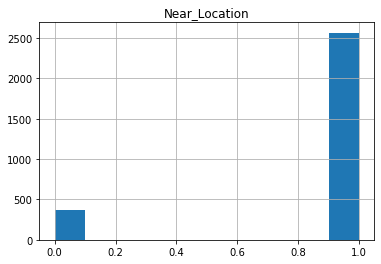

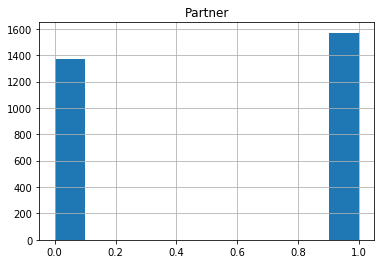

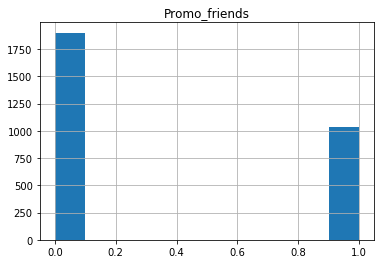

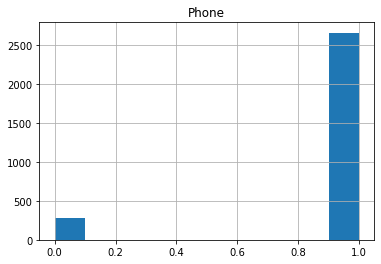

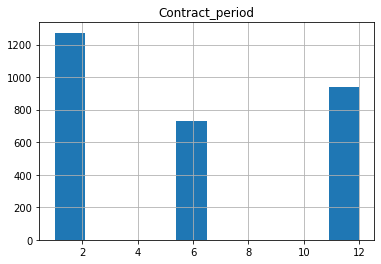

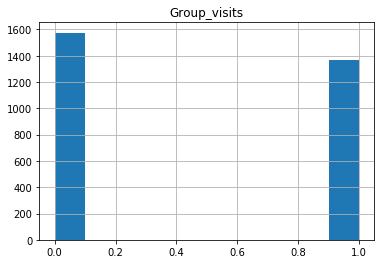

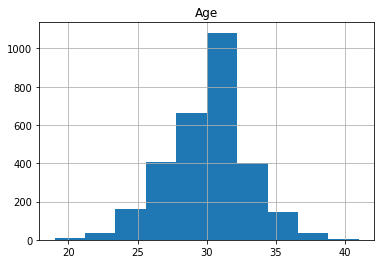

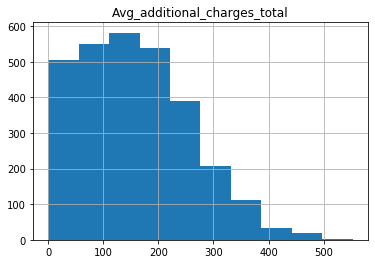

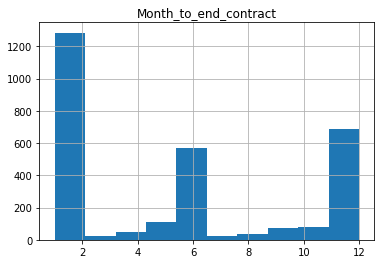

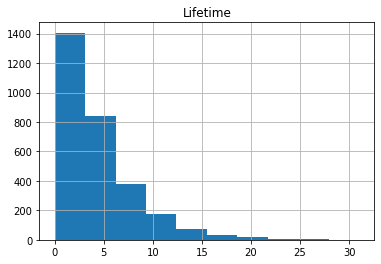

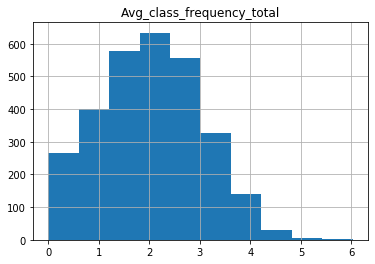

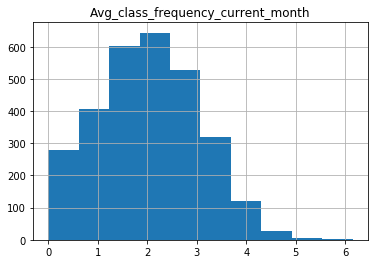

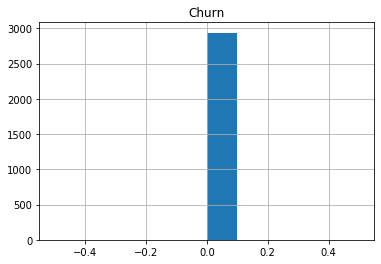

In [10]:
# построим гистограммы метрик тех, кто остался
for i in stayed.columns:
    print(stayed.hist(i));

По графикам видно, что в данных для тех, кто остался: 
- распределяние по полу (мужской/женский) практически одинаково; 
- тех, кто живет поблизости почти в 5 раз больше, чем тех кто живет далеко; 
- партнеров клуба и непартнеров практически одинаково; 
- тех, кто использовал промо-код от знакомого при оплате первого абонемента в 2 раза меньше, чеи без него;
- большая часть клиентов с длительностью текущего действующего абонемента 1 месяц, но доли с абонементом на 6 месяцев и год также велики;
- тех, кто посещает групповых занятия и не посещает практически одинаково;
- средний возраст посетителей 30 лет;
- суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон в среднем до 400 у.е.
- у большинства срок до окончания текущего действующего абонемента 1 месяц, но доли со сроком на 6 месяцев и год также велики;
- у большинства прошло до 5 месяцев с момента первого обращения в фитнес-центр;
- 1 -3 раза средняя частота посещений в неделю за все время с начала действия абонемента
- большинство посещает спортзал от 1 до 3 раза в неделю за предыдущий месяц;

In [11]:
# построим матрицу корреляций тех, кто ушел
outflow_corr = outflow.corr()

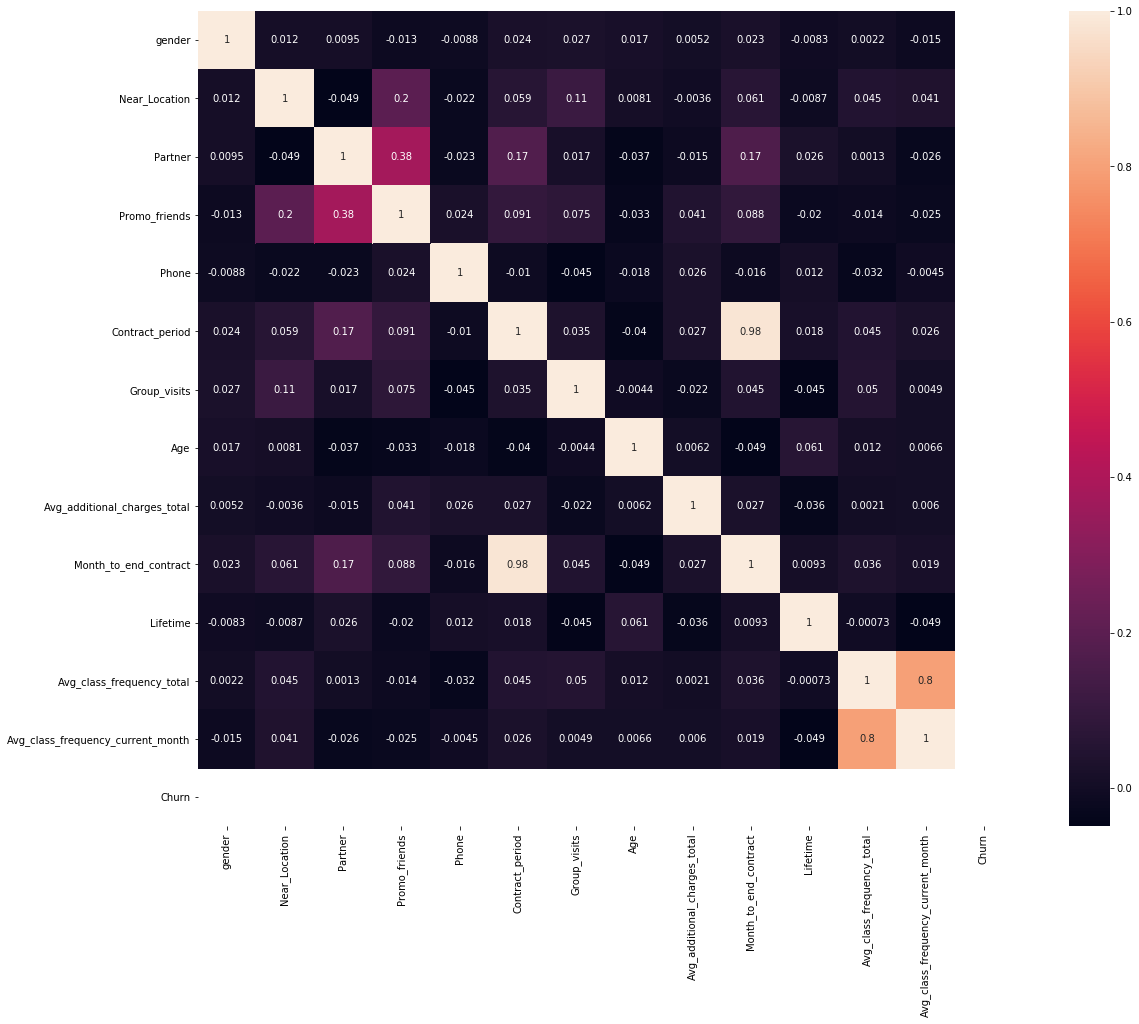

In [12]:
plt.subplots(figsize=(20,15))
sns.heatmap(outflow_corr, annot = True, square = True) 
#ax.set_ylim(7, 0) 
plt.show()

На тепловой карте матрицы корреляций в данных тех, кто ушел практически нет корреляций между метриками кроме длительности абонемента и срока до окончания текущего действующего абонемента (в месяцах) и средняя частота посещений в неделю за все время с начала действия абонемента и средняя частота посещений в неделю за предыдущий месяц, но эти метрики в целом достаточно зависимы друг от друга.

In [13]:
# построим матрицу корреляций тех, кто остался
stayed_corr = stayed.corr()

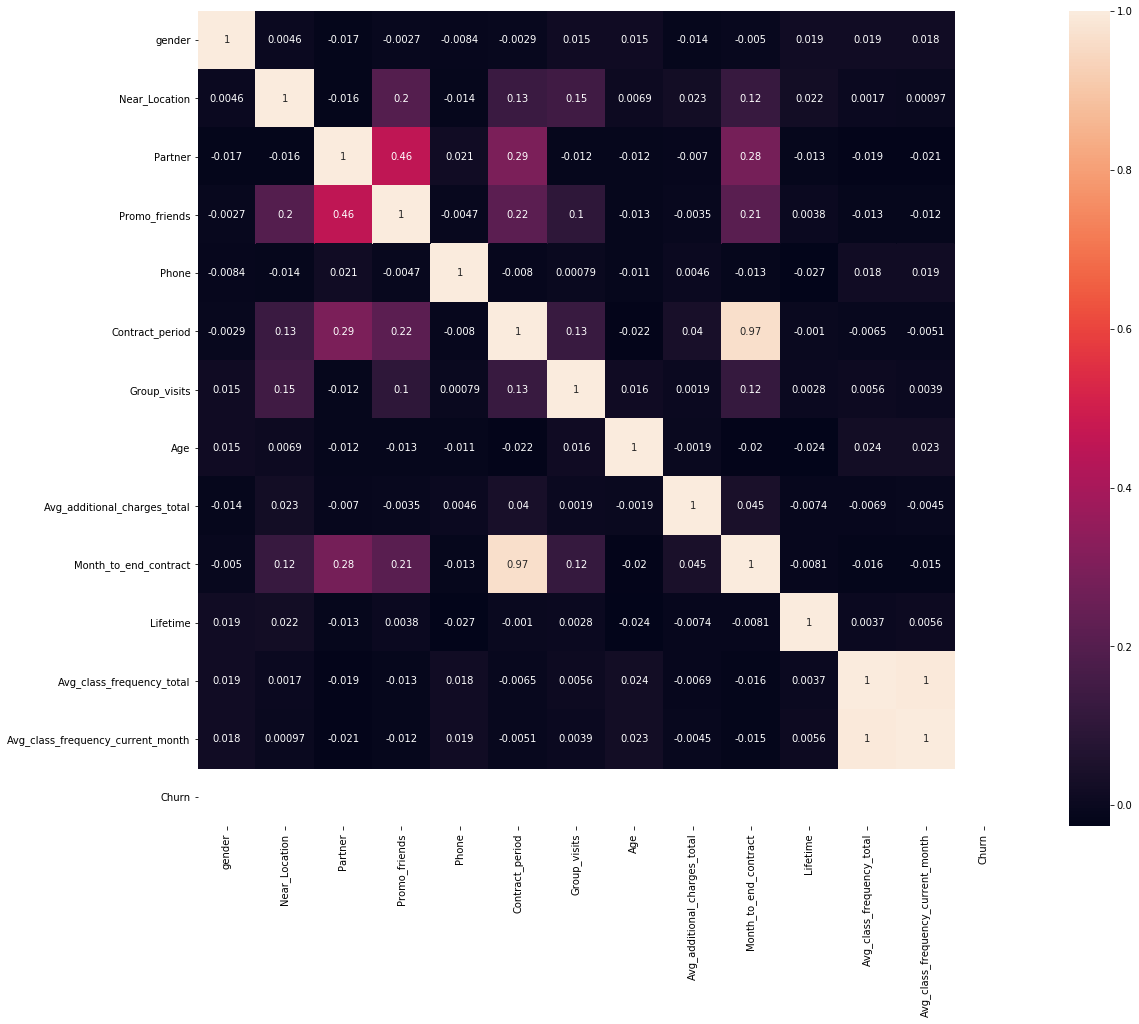

In [14]:
#fig, ax = plt.subplots()
plt.subplots(figsize=(20,15))
sns.heatmap(stayed_corr, annot = True, square = True) 
#ax.set_ylim(7, 0) 
plt.show()

На тепловой карте матрицы корреляций в данных тех, кто остался присутсвует уже больше зависимостей между метриками. Так например, есть сильная связь между сотрудник компании-партнёра клуба и тех, кто использовал промо-код от знакомого при оплате первого абонемента, это говорит о мультиколлениарности.

In [15]:
#сделала более наглядные графики
# разделим столбцы на котегориальные и числовые
binar_feature = []
numeric_feature = []
for feature in data.drop('Churn', axis=1).columns:
    if data[feature].nunique() == 2:
        binar_feature.append(feature)
    else:
        numeric_feature.append(feature)

In [16]:
#Словарь единиц измерений числовых признаков

feature_unit = {'Contract_period':'Количество месяцев',
                'Age':'Годы',
                'Avg_additional_charges_total':'Затраты',
                'Month_to_end_contract':'Количество месяцев',
                'Lifetime':'Количество месяцев',
                'Avg_class_frequency_total':'Количество посещений',
                'Avg_class_frequency_current_month':'Количество посещений'}

#Функция которая будет строить два вида диаграмм: барплот для категориальных признаков или гистограмму для числовых

def feature_plot(feature):
    if feature in binar_feature:
        plt.figure(figsize=(9,5))
        x = np.array([0,1])
        width = 0.2
        plt.bar(height=data[data['Churn'] == 0][feature].value_counts().sort_index(), 
                x=x-width/2, 
                label='Остались',
                width=width)
        plt.bar(height=data[data['Churn'] == 1][feature].value_counts().sort_index(), 
                x=x+width/2, 
                label='Ушли',
                width=width)
        plt.xticks(x, fontsize=10)
    else:
        plt.figure(figsize=(9,5))
        plt.hist(data[data['Churn'] == 0][feature], label='Остались')
        plt.hist(data[data['Churn'] == 1][feature], label='Ушли', alpha=0.9)
        plt.xlabel(feature_unit[feature], fontsize=12, labelpad=12)
        plt.xticks(fontsize=10)
    plt.title(feature, fontsize=14, pad=14)
    plt.legend()
    plt.ylabel('Количество человек', fontsize=12, labelpad=12)
    plt.yticks(fontsize=10)
    sns.despine()
    plt.grid(axis='y')
    plt.show()

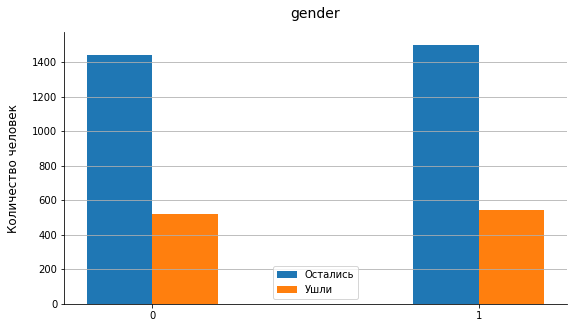

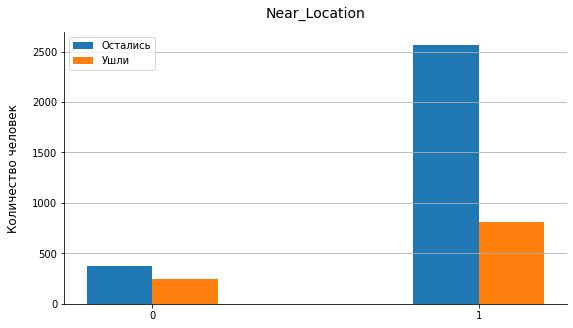

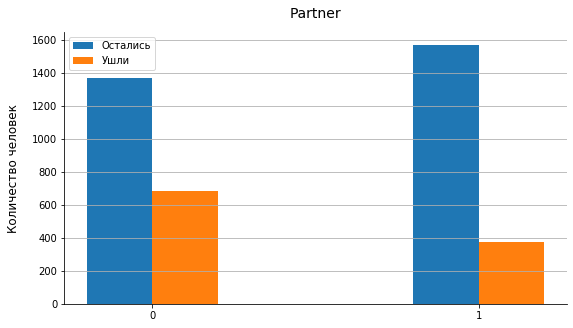

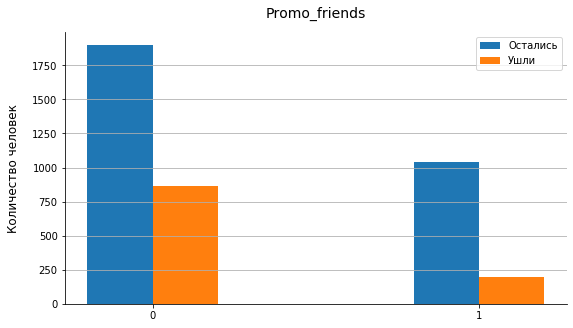

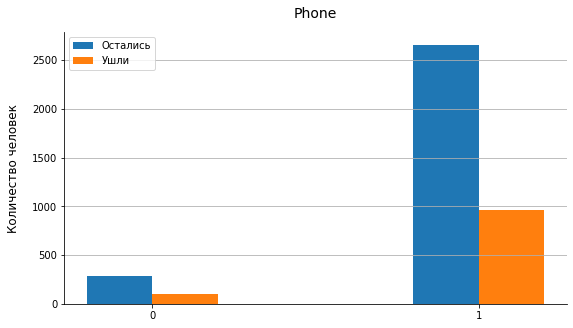

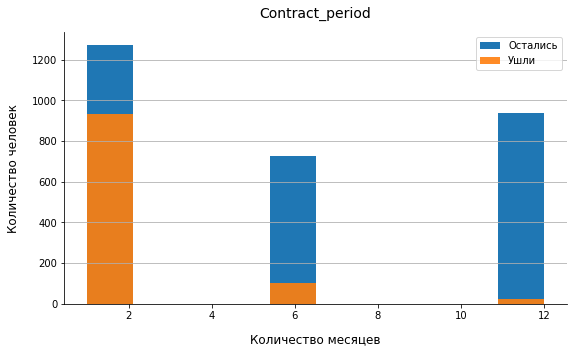

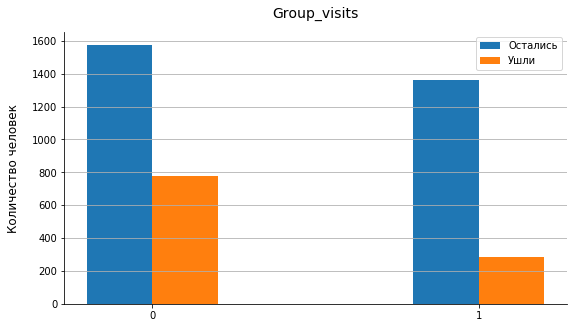

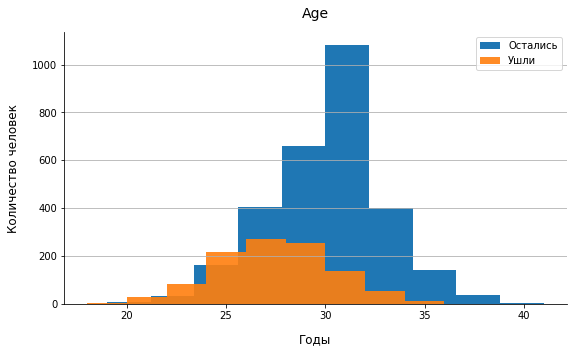

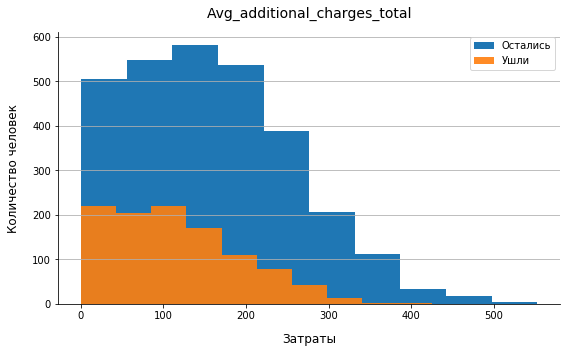

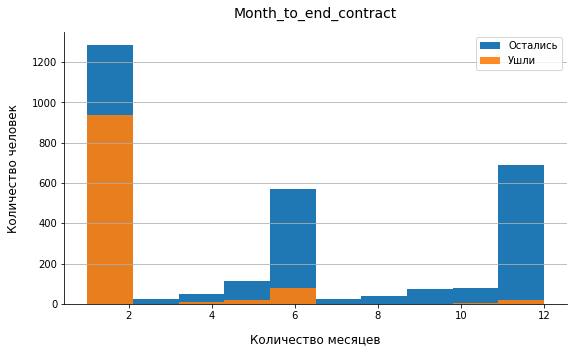

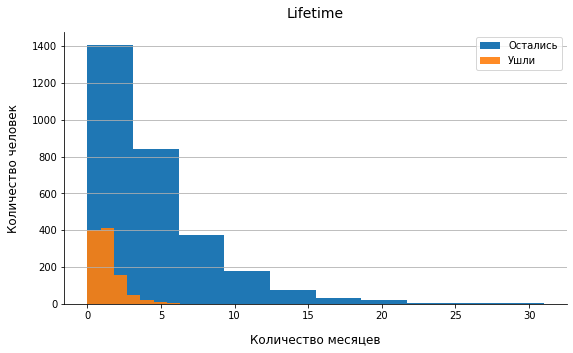

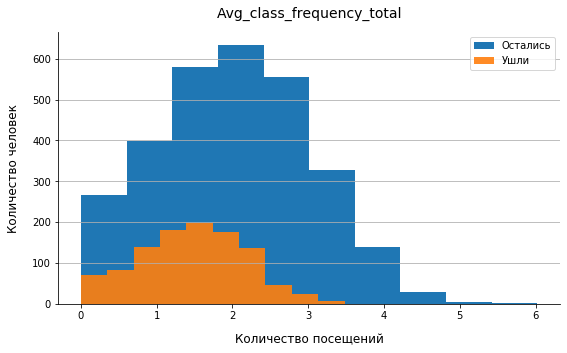

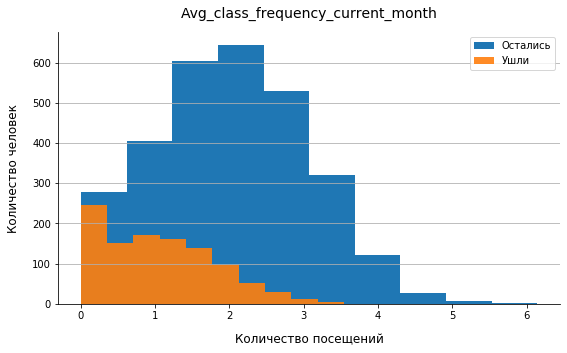

In [17]:
for i in data.drop('Churn', axis=1).columns:
    feature_plot(i)

# Вывод

Между группами клиентов тех, кто остался и тех, кто ушел есть различия: средний возраст клиентов, кто остался 30 лет, кто ушел 27, кто остался тратят в среднем на 100 у.е. в месяц больше, чем те, кто ушел. Как правило те кто остался имееют абонементы с более долгим сроком (6 и 12 месяцев) и посещают фитнес 2-3 раза в неделю, а те, кто ушел имели абонементы на 1 месяц и посещали зал 1-2 раза в неделю. Групповые занятия посещали меньше те, кто в ушел.

 # Модель прогнозирования оттока клиентов

In [18]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = data.drop(columns = ['Churn'])
y = data['Churn']

#разделяем модель на обучающую и валидационную выборки
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#создадим объект класса StandardScaler и применим его к обучающей выборке

X_train_st = scaler.fit_transform(X_train) #обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
print(X_train_st[:5])

#применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

[[-1.01511421  0.4175068   1.03175391  1.4800097   0.31628211  1.60502986
  -0.84769226  0.57944798  0.37161711  1.59173796  1.12734972  1.75580418
   1.61822807]
 [-1.01511421  0.4175068  -0.96922337 -0.67567125  0.31628211 -0.81299073
  -0.84769226  0.27046055 -1.09697378 -0.79568246  5.88138322 -0.2239674
  -0.01340886]
 [ 0.98511083  0.4175068   1.03175391 -0.67567125  0.31628211  1.60502986
  -0.84769226 -0.65650171 -1.18374157  1.83048     0.3350108  -0.84308456
  -0.80541199]
 [-1.01511421  0.4175068   1.03175391  1.4800097   0.31628211  0.28610954
  -0.84769226 -0.96548914 -0.95158829  0.39802775  1.39146269  0.66771379
   0.64605224]
 [-1.01511421  0.4175068  -0.96922337 -0.67567125 -3.16173427 -0.81299073
  -0.84769226 -0.03852687  0.97190435 -0.79568246  0.07089783 -0.19587934
  -0.16038147]]


In [19]:
model = LogisticRegression() 

# обучите модель
model.fit(X_train, y_train)

# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:,1]

print(predictions)
print(probabilities)

[0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1
 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0
 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 0 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions) ))
print('Precision: {:.2f}'.format(precision_score (y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, predictions)))
from sklearn.metrics import roc_auc_score
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities)))

Accuracy: 0.93
Precision: 0.86
Recall: 0.83
ROC_AUC: 0.97


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [22]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]




In [23]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions) ))
print('Precision: {:.2f}'.format(precision_score (y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, rf_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, rf_probabilities)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.81
ROC_AUC: 0.97


# Вывод

По метрикам Accuracy и Precision и Recall лучше обучать модель способом логистической регрессии, чем случайным лесом.

# Кластеризация клиентов

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # создаём объект класса scaler (нормализатор)
x_sc = scaler.fit_transform(data.drop(columns = ['Churn'])) # обучаем нормализатор и преобразуем набор данных 

In [25]:
print(x_sc[:10]) 

[[ 0.97970588  0.42788074  1.02686062  1.49716101 -3.05985201  0.28989014
   1.19403206 -0.0565538  -1.37753121  0.16160501 -0.19332863 -1.91191971
  -1.67847198]
 [-1.0207145   0.42788074 -0.973842   -0.66793083  0.32681319  1.60882159
   1.19403206  0.55732732 -0.35021325  1.83194105  0.87368001  0.04517569
   0.1360137 ]
 [-1.0207145   0.42788074  1.02686062 -0.66793083  0.32681319 -0.8092194
  -0.83749845 -0.36349436 -0.1815923  -0.79287273 -0.46008079 -0.02049263
  -0.02901851]
 [-1.0207145   0.42788074  1.02686062  1.49716101  0.32681319  1.60882159
   1.19403206  1.17120844 -0.87472237  1.83194105 -0.46008079  1.36465509
   1.51045005]
 [ 0.97970588  0.42788074  1.02686062  1.49716101  0.32681319 -0.8092194
  -0.83749845 -0.97737548  0.5336998  -0.79287273 -0.19332863 -0.78707638
  -0.61454183]
 [ 0.97970588  0.42788074 -0.973842   -0.66793083  0.32681319 -0.8092194
   1.19403206  1.478149    3.15330097 -0.79287273 -0.19332863  0.76580519
   0.82634551]
 [ 0.97970588  0.42788074

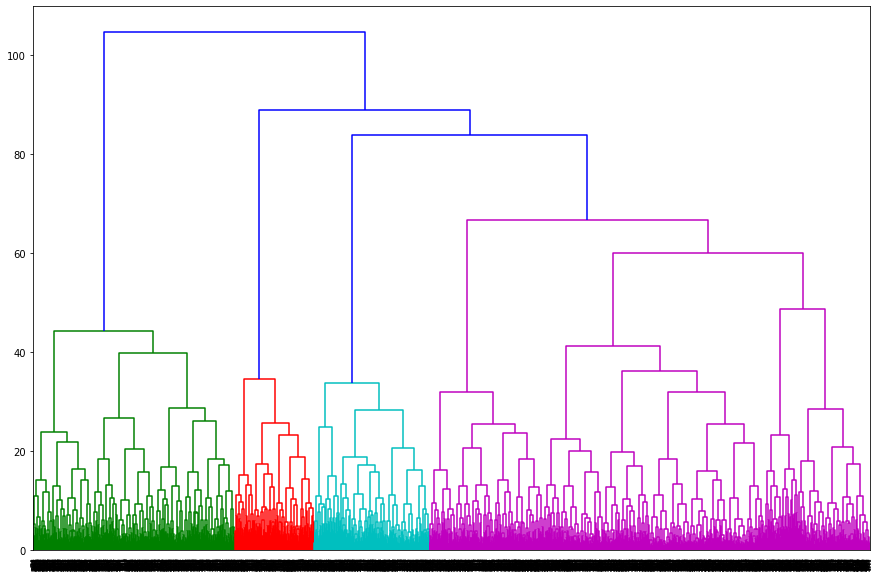

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage 

linked = linkage(x_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

По дендрограмме данные делятся на 5 кластеров.

In [27]:
from sklearn.cluster import KMeans

# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(data)
km = KMeans(n_clusters = 5) # задаём число кластеров, равное 5
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров
data['cluster'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
mean_churn = data.groupby(['cluster']).mean().sort_values(by= 'Churn', ascending = False).reset_index()
mean_churn


,cluster,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,0.512563,1.000000,0.329146,0.219849,0.899497,1.610553,0.292714,26.947236,114.163411,1.560302,0.968593,1.479996,1.050512,0.998744
1,2,0.498084,0.000000,0.467433,0.074713,0.913793,2.160920,0.206897,28.421456,132.099922,2.036398,2.674330,1.599838,1.401074,0.469349
2,3,0.512770,0.945972,0.764244,0.549116,0.901768,11.381139,0.558939,29.887033,163.632184,10.438114,4.703340,2.001689,1.996309,0.016699
3,1,0.550535,0.951249,0.367420,0.259215,0.910820,2.865636,0.469679,30.127229,162.433078,2.626635,4.774078,2.967353,2.976007,0.003567
4,4,0.471446,0.998785,0.430134,0.295261,0.895504,2.817740,0.417983,29.998785,151.592826,2.613609,4.773998,1.178158,1.173238,0.001215


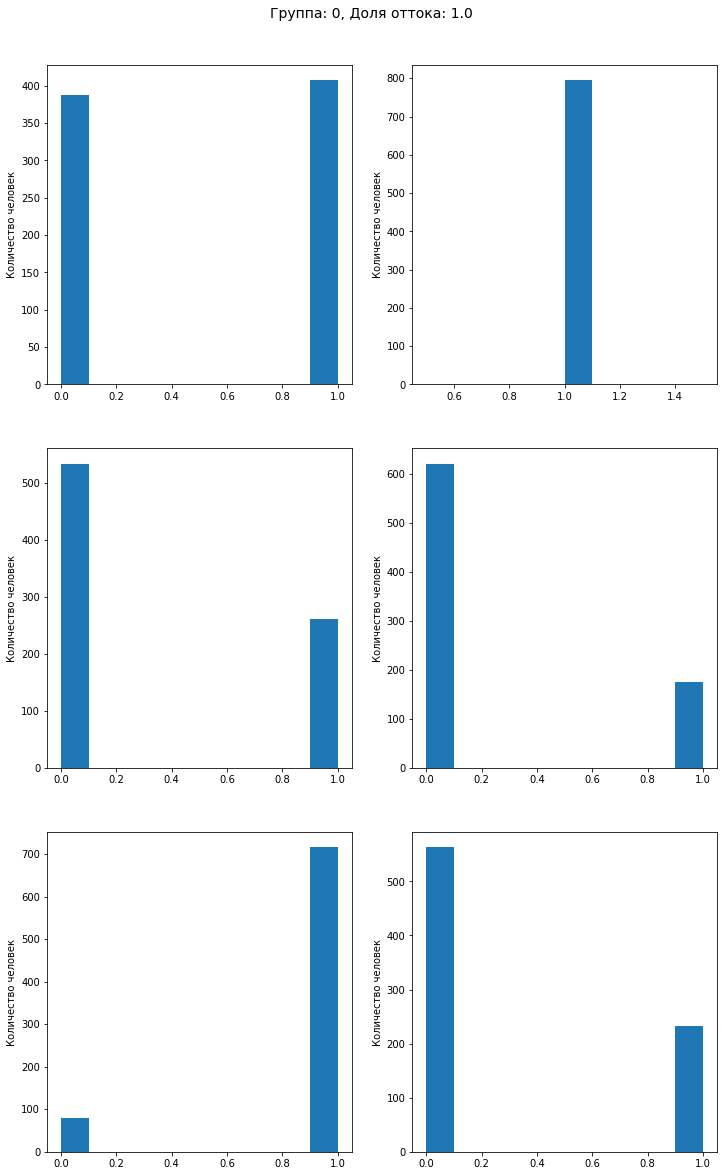

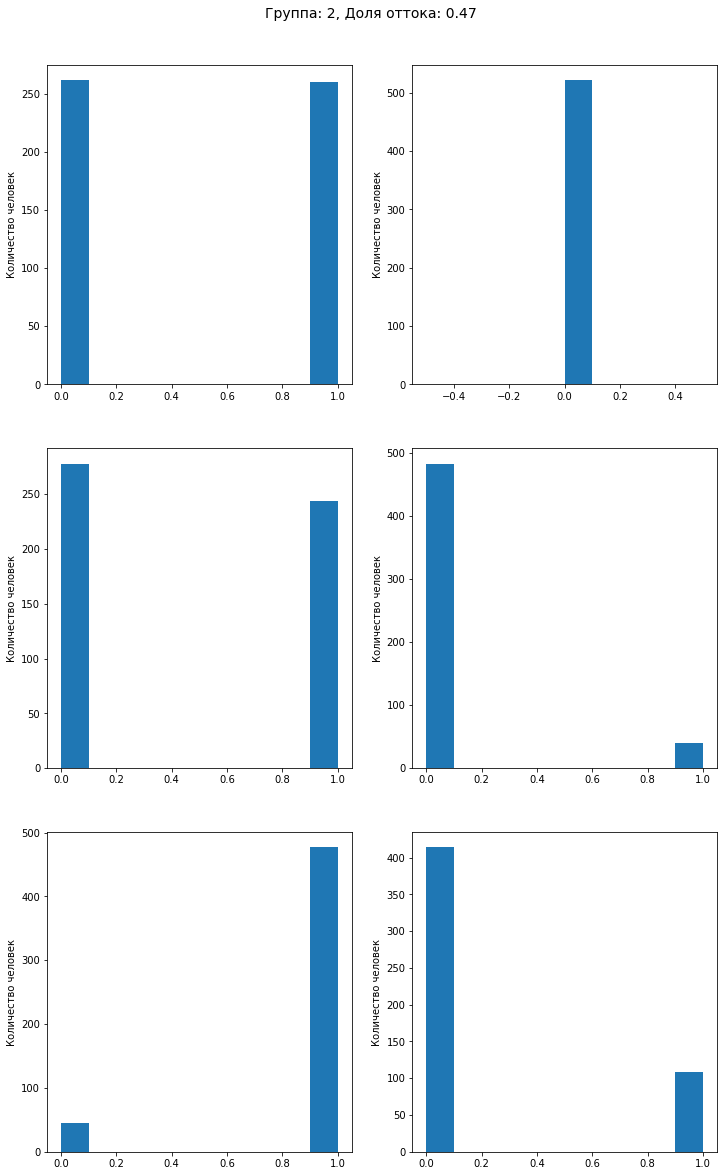

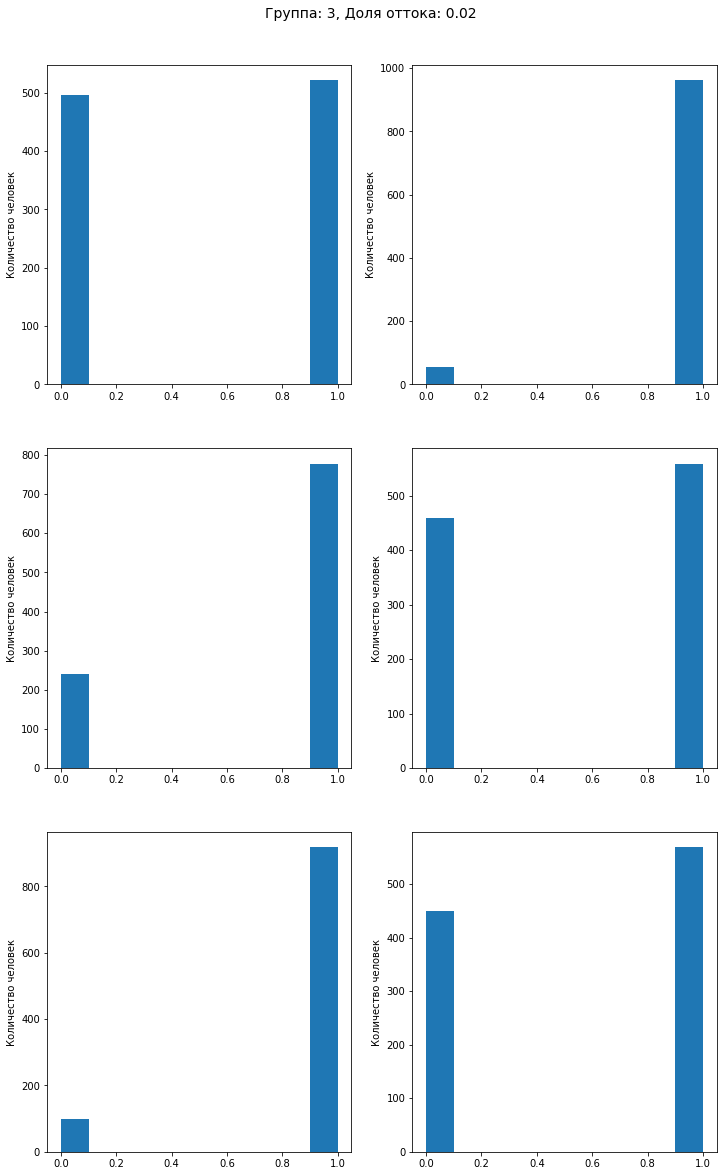

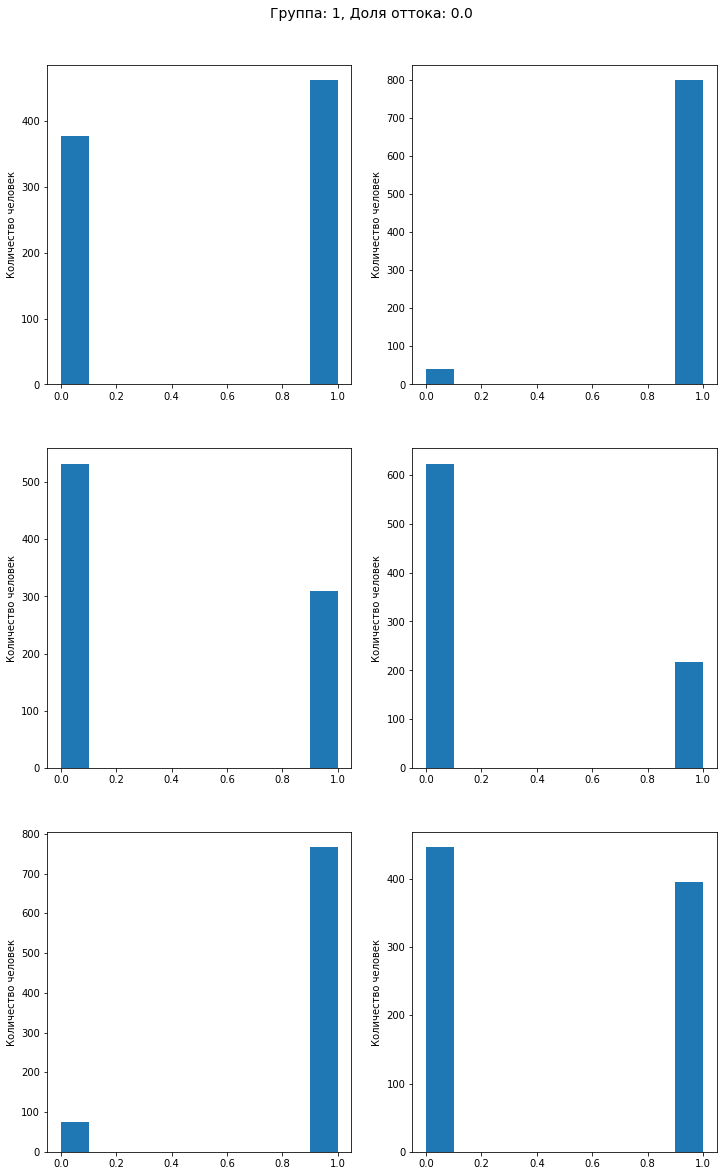

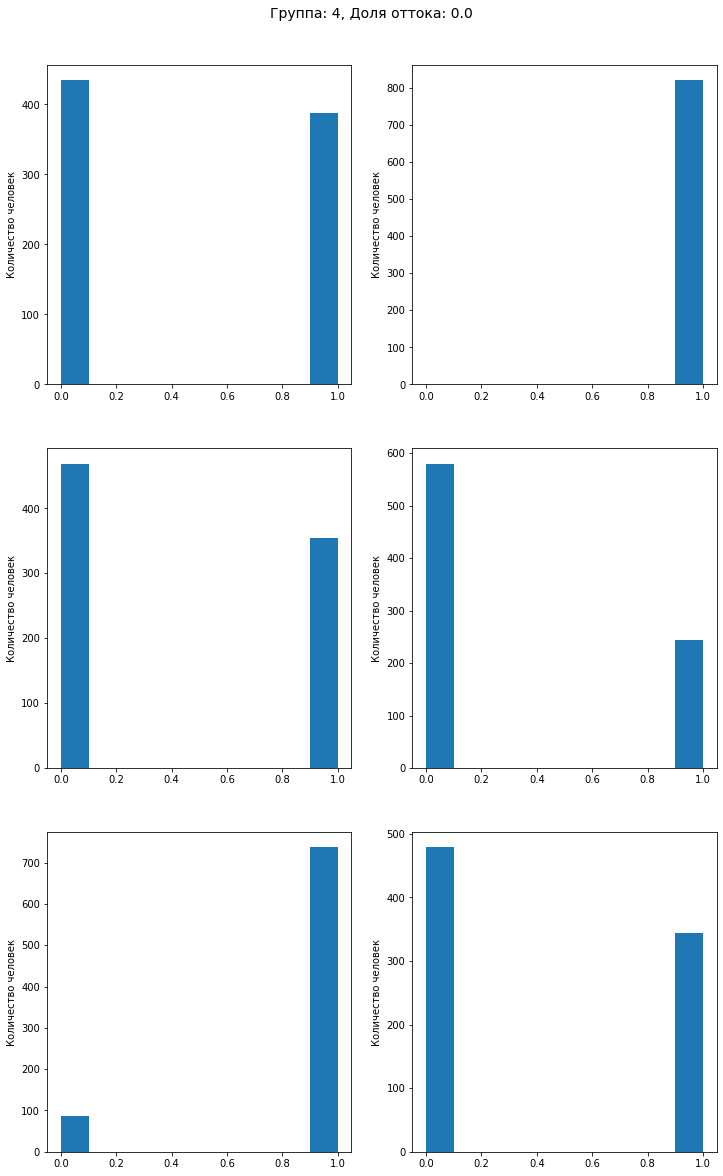

In [28]:
for d in mean_churn['cluster']:
    df = data[data['cluster'] == d]
    bin_num = 0
    #height = 4
    fig, axes = plt.subplots(3, 2, figsize=(12,20))
    for i in range(0,3):
        for j in range(0,2):
            axes[i, j].hist(df[binar_feature[bin_num]])
             #axes[i, j].set_title(feature_translate[numeric_feature[feat_num]])
                  #axes[i, j].set_xlabel(feature_unit[numeric_feature[feat_num]])
            axes[i, j].set_ylabel('Количество человек')
            plt.suptitle('Группа: {}, Доля оттока: {}'.format(d, round(df['Churn'].mean(), 2)), 
                             y=0.92, fontsize=14)
            bin_num += 1  
           
      

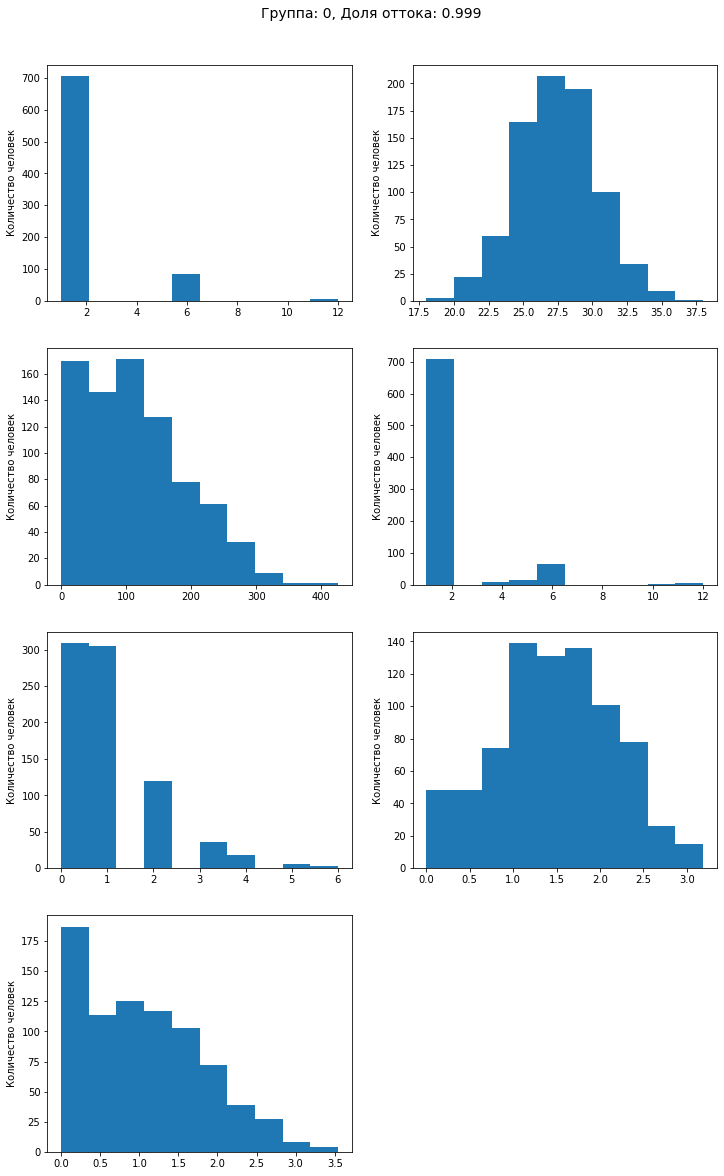

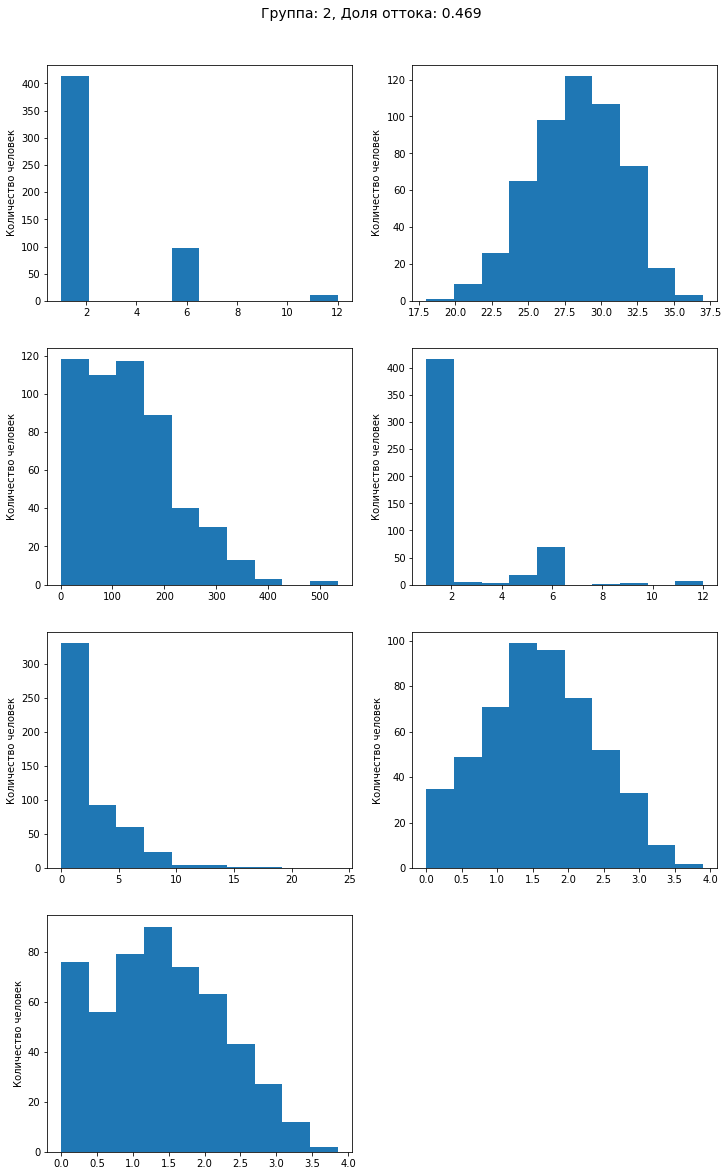

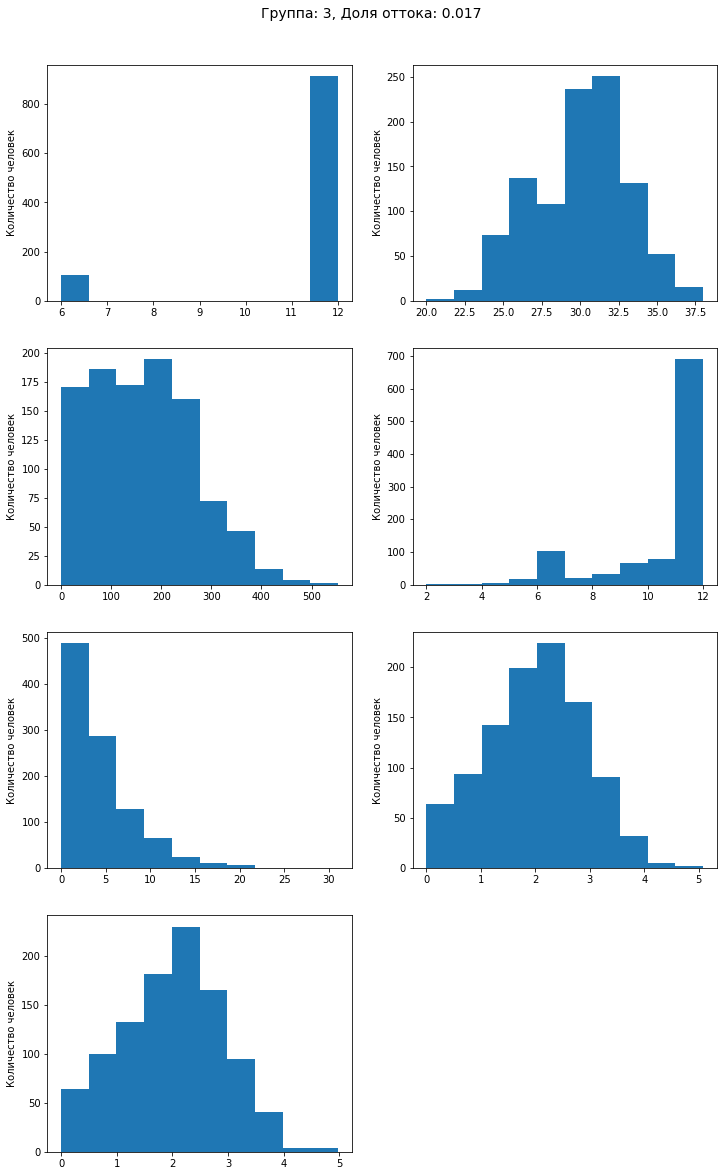

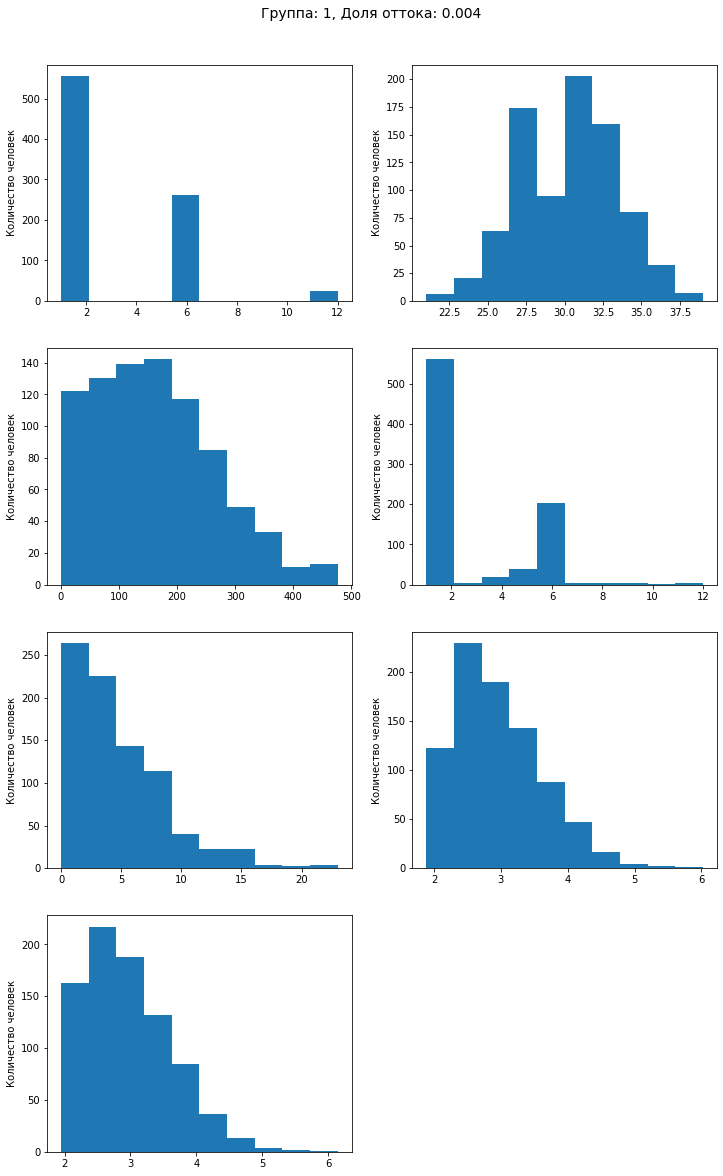

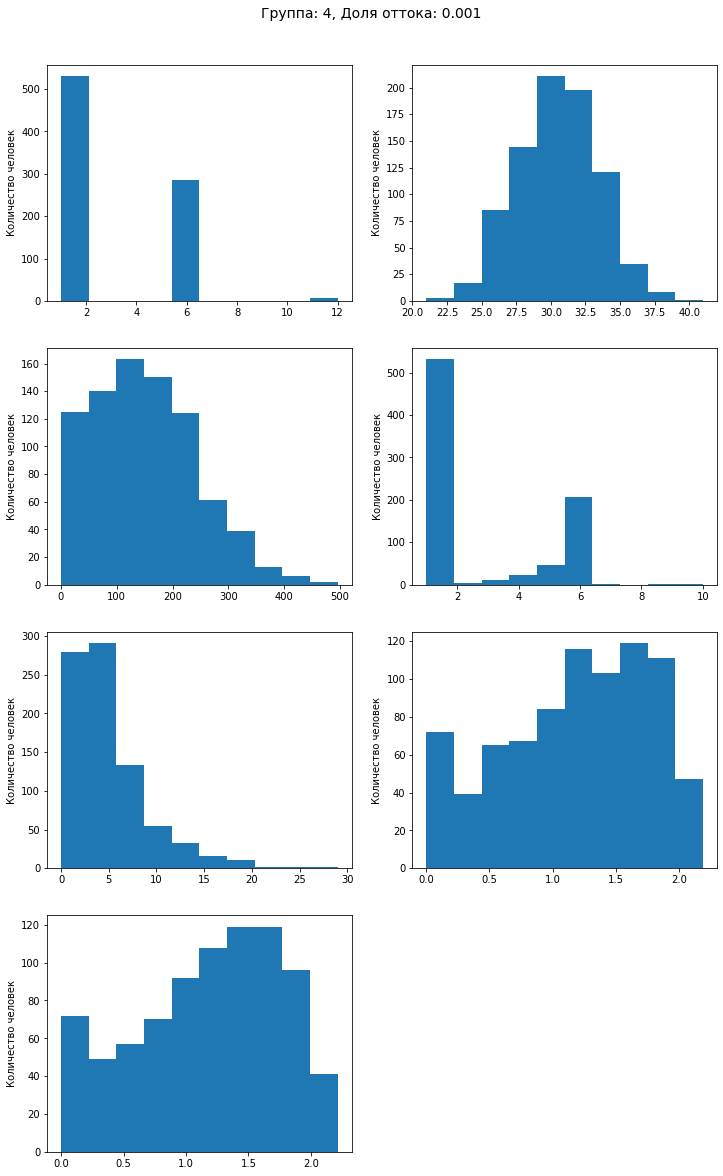

In [29]:
for d in mean_churn['cluster']:
    df = data[data['cluster'] == d]
    feat_num = 0
    fig, axes = plt.subplots(4, 2, figsize=(12,20))
    for i in range(0,4):
        for j in range(0,2):
            try:
                axes[i, j].hist(df[numeric_feature[feat_num]])
                #axes[i, j].set_title(feature_translate[numeric_feature[feat_num]])
                #axes[i, j].set_xlabel(feature_unit[numeric_feature[feat_num]])
                axes[i, j].set_ylabel('Количество человек')
                plt.suptitle('Группа: {}, Доля оттока: {}'.format(d, round(df['Churn'].mean(), 3)), 
                             y=0.92, fontsize=14)
                feat_num += 1  
            except:
                axes[i, j].axis('off')

Мы поделили посетителей на 5 кластеров: группа 0, группа 1, группа 2, группа 3 и группа 4. В 3 группе самая высокая доля оттока 0.998. По графикам видно, что у этих людей в основном самые короткие абонементы на 1 месяц. Очень мало людей тратят на доп услуги. Посещают 1-2 раза в неделю. Меньше всех посещают групповые занятия, по сравнению с другими группами. Наименьшая доля клиентов по Промо.

В 4 группе доля оттока 0.262, у них тоже большое количество абонементов на 1 месяц, но уже значительные доли абонементов на 6 и 12 мемяцев. Посещают 2 раза в неделю в среднем. 

В группе 2 доля оттока 0.016, преобладают абонементы сроком на 12 месяцев, Посещают 2-3 раза в неделю. Наибольшее количество клиентов по партнерской программе.

В группе 1 доля оттока 0.007, преобладают абонементы сроком на 1 месяц, но велика доля абонементов на 6 месяцев. Посещают не меньше 2-3 раз в неделю

В группе 0 доля оттока 0.001, преобладают абонементы сроком на 1 месяц,но велика доля абонементов на 6 месяцев. Посещают 1-2 раза в неделю в среднем.

# Общий вывод

В данной работе были проанализированы данные о клиентах фитнес центра с целью выявления типичных портретов клиентов и прогнозирования их оттока. Была сделана модель, обученная способом логистической регрессии для предсказания оттока. 

С учетом имеющихся данных ниже даны рекомендации для  стратегии взаимодействия с клиентами и их удержания:

1.  На долгосрочные абонементы ниже отток, неоюходимо ориентироваться на продажу абонеметнов сроком от 6 мес.
2.  Можно заключить договора с другими компаниями и дать их сотрудникам скидку, такие клиенты реже уходят. 
3.  Те, кто посещают групповые занятия реже уходят. Необходимо рассмотреть возможномть расширения количества групп для групповых занятий или оптимизировать расписание. 
4.  Не забывать устраивать промо-акции. По ним приходят много клиентов, которые остаются. 